# Lecuture

## Task 1

Consider 1D image: `[12, 15, 16, 18, 56, 22, 25, 30, 33, 38]`

1. Make a plot
2. Apply a mean filter with 3 pixel window
3. Apply a mean filter with 5 pixel window
4. Apply a Gaussian filter with 3 pixel window
5. Apply a Gaussian filter with 3 pixel window

In [80]:
from typing import List, Callable
from random import randint

import matplotlib.pyplot as plt
import numpy as np

image = [12, 15, 16, 18, 56, 22, 25, 30, 33, 38]

gaussian_3 = [1, 2, 1]
gaussian_5 = [1, 2, 4, 2, 1]

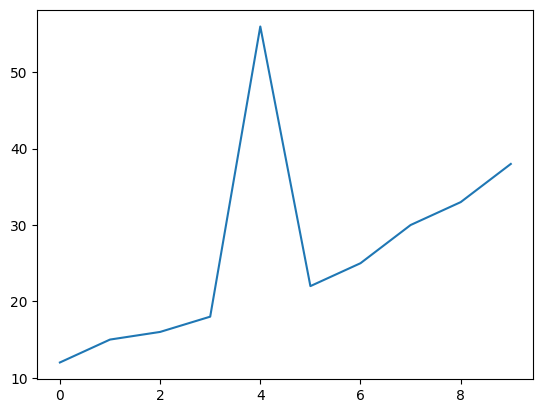

In [81]:
plt.plot(np.array(image))
plt.show()

In [82]:
def copy_padding(image: List, padding: int) -> List:
    return [image[0]] * padding + image + [image[-1]] * padding

def zero_padding(image: List, padding: int) -> List:
    return [0] * padding + image + [0] * padding

def average_padding(image: List, padding: int) -> List:
    average = sum(image) / len(image)
    return [average] * padding + image + [average] * padding

def random_padding(image: List, padding: int) -> List:
    rand = randint(min(image), max(image))
    return [rand] * padding + image + [rand] * padding

In [83]:
def plot_filtered(image: List, padding: int, filter: Callable[[List], List]):
    filtered_images = list()
    for padder in (copy_padding, zero_padding, average_padding, random_padding):
        padded_image = padder(image, padding)
        filtered_images += [filter(padded_image)]
    _, axes = plt.subplots(2, 2)
    for idx, image in enumerate(filtered_images):
        axes[idx // 2][idx % 2].plot(image)
    axes[0][0].set_title("copy padding")
    axes[0][1].set_title("zero padding")
    axes[1][0].set_title("average padding")
    axes[1][1].set_title("random padding")

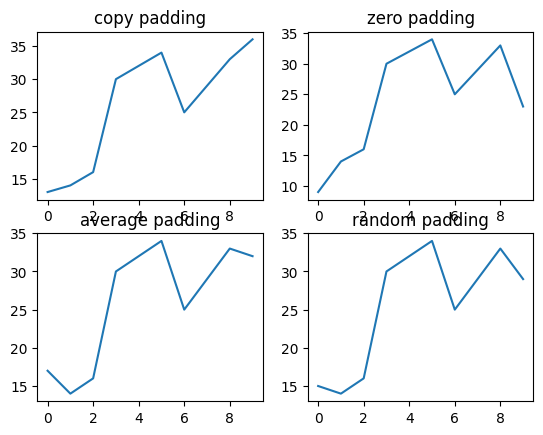

In [84]:
def mean_3_filter(padded_image: List) -> List:
    filtered_image = np.array([0] * len(image))
    for i in range(len(filtered_image)):
        filtered_image[i] = sum(padded_image[i:i+3]) / 3
    return filtered_image

plot_filtered(image, 1, filter)
plt.show()

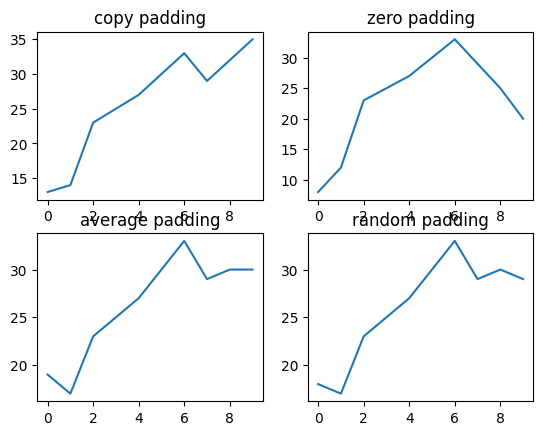

In [85]:
def mean_5_filter(padded_image: List) -> List:
    filtered_image = np.array([0] * len(image))
    for i in range(len(filtered_image)):
        filtered_image[i] = sum(padded_image[i:i+5]) / 5
    return filtered_image

plot_filtered(image, 2, mean_5_filter)
plt.show()

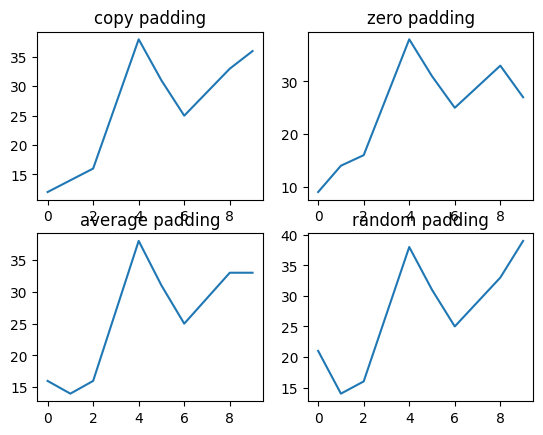

In [86]:
def gaussian_3_filter(padded_image: List) -> List:
    filtered_image = np.array([0] * len(image))
    for i in range(len(filtered_image)):
        filtered_image[i] = sum(padded_image[i:i+3] * np.array(gaussian_3)) / sum(gaussian_3)
    return filtered_image

plot_filtered(image, 1, gaussian_3_filter)
plt.show()

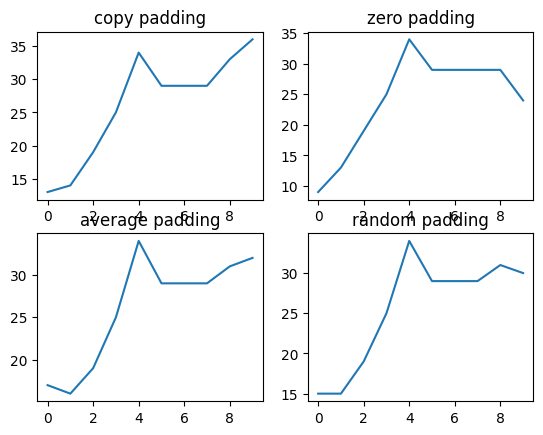

In [87]:
def gaussian_5_filter(padded_image: List) -> List:
    filtered_image = np.array([0] * len(image))
    for i in range(len(filtered_image)):
        filtered_image[i] = sum(padded_image[i:i+5] * np.array(gaussian_5)) / sum(gaussian_5)
    return filtered_image

plot_filtered(image, 2, gaussian_5_filter)
plt.show()

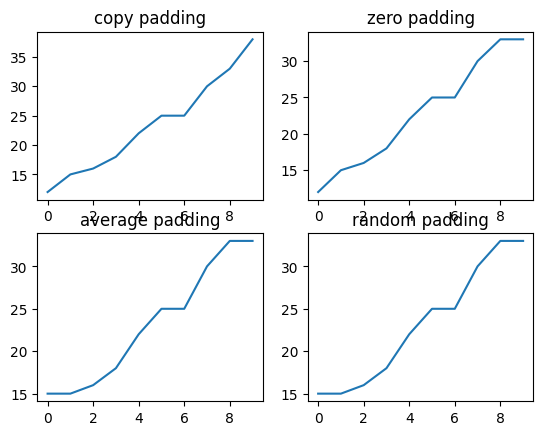

In [88]:
def average_3_filter(padded_image: List) -> List:
    filtered_image = np.array([0] * len(image))
    for i in range(len(filtered_image)):
        filtered_image[i] = sorted(padded_image[i:i+3])[1]
    return filtered_image

plot_filtered(image, 1, average_3_filter)
plt.show()

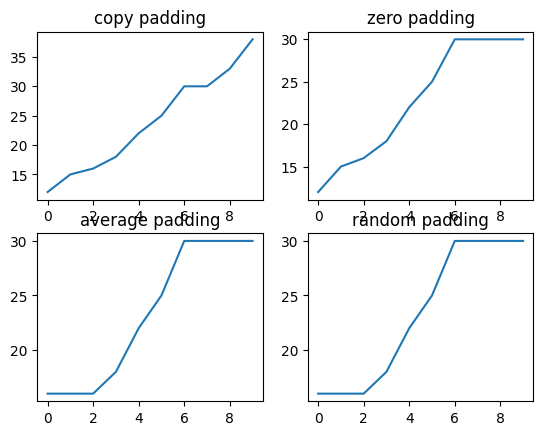

In [89]:
def average_5_filter(padded_image: List) -> List:
    filtered_image = np.array([0] * len(image))
    for i in range(len(filtered_image)):
        filtered_image[i] = sorted(padded_image[i:i+5])[2]
    return filtered_image

plot_filtered(image, 2, average_5_filter)
plt.show()